# Target Variables Analysis

## 📊 Understanding Our Target Indicators

Our model aims to predict three key financial indicators that capture different aspects of market performance:

### 1. **Forward Returns** (`forward_returns`)
- **Definition**: The next-day return of the S&P 500 index
- **Formula**: (Price_tomorrow - Price_today) / Price_today
- **Importance**: This is our primary prediction target - the actual market movement we want to forecast
- **Range**: Typically between -4% to +4% daily
- **Investment Use**: Direct signal for market direction and magnitude

### 2. **Risk-Free Rate** (`risk_free_rate`)
- **Definition**: The return on risk-free government securities (typically Treasury bills)
- **Importance**: Represents the baseline return investors can earn without taking any risk
- **Investment Use**: Used to calculate risk premiums and evaluate if market returns justify the risk taken
- **Typical Range**: 0% to 0.03% daily (0% to 8% annually)

### 3. **Market Forward Excess Returns** (`market_forward_excess_returns`)
- **Definition**: Forward returns minus the risk-free rate
- **Formula**: forward_returns - risk_free_rate
- **Importance**: Measures the **risk premium** - extra return for taking market risk
- **Investment Use**: Key metric for risk-adjusted performance evaluation
- **Interpretation**: Positive values indicate the market is compensating investors for risk

## 🎯 Why These Targets Matter

These three indicators together provide a complete picture of market performance:
- **Absolute returns** (forward_returns): Raw market movement
- **Risk-free benchmark** (risk_free_rate): Opportunity cost of capital
- **Risk-adjusted returns** (excess_returns): True economic profit after accounting for risk

This framework allows investors to make informed decisions about whether market risk is being adequately compensated.

In [8]:
# 1. IMPORTS AND SETUP (Essential libraries only)
# ===============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set basic matplotlib style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

# Load data with full file path
train_df = pd.read_csv(r"C:\Users\Bhekiz\Documents\School\Independent study\hull-tactical-market-prediction\train.csv")

print("📊 Dataset loaded successfully!")
print(f"Training data: {train_df.shape}")
print(f"Columns: {list(train_df.columns[:10])}...")  # Show first 10 column names

📊 Dataset loaded successfully!
Training data: (8990, 98)
Columns: ['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9']...


In [9]:
# 2. BASIC DATASET OVERVIEW TABLE
# ===============================
def create_dataset_overview():
    """Create comprehensive dataset overview table"""
    
    overview_data = {
        'Metric': [
            'Total Rows', 'Total Columns', 'Date Range (ID)', 
            'Memory Usage (MB)', 'Target Variables', 'Feature Variables'
        ],
        'Training Data': [
            f"{train_df.shape[0]:,}",
            train_df.shape[1],
            f"{train_df['date_id'].min()} - {train_df['date_id'].max()}",
            f"{train_df.memory_usage(deep=True).sum() / 1024**2:.1f}",
            "3 (forward_returns, risk_free_rate, market_forward_excess_returns)",
            f"{train_df.shape[1] - 4} features"
        ]
    }
    
    overview_df = pd.DataFrame(overview_data)
    return overview_df

overview_table = create_dataset_overview()
print("\n📋 DATASET OVERVIEW")
print("=" * 50)
print(overview_table.to_string(index=False))


📋 DATASET OVERVIEW
           Metric                                                      Training Data
       Total Rows                                                              8,990
    Total Columns                                                                 98
  Date Range (ID)                                                           0 - 8989
Memory Usage (MB)                                                                6.7
 Target Variables 3 (forward_returns, risk_free_rate, market_forward_excess_returns)
Feature Variables                                                        94 features


In [10]:
# 3. FEATURE CATEGORY ANALYSIS TABLE
# ==================================
def analyze_feature_categories():
    """Analyze features by category with counts and missing data"""
    
    # Define feature categories
    feature_cols = [col for col in train_df.columns if col not in ['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']]
    
    categories = {
        'Market Dynamics (M)': [col for col in feature_cols if col.startswith('M')],
        'Macro Economic (E)': [col for col in feature_cols if col.startswith('E')],
        'Interest Rates (I)': [col for col in feature_cols if col.startswith('I')],
        'Price/Valuation (P)': [col for col in feature_cols if col.startswith('P')],
        'Volatility (V)': [col for col in feature_cols if col.startswith('V')],
        'Sentiment (S)': [col for col in feature_cols if col.startswith('S')],
        'Binary/Dummy (D)': [col for col in feature_cols if col.startswith('D')]
    }
    
    category_analysis = []
    
    for category, features in categories.items():
        if features:
            missing_pct = (train_df[features].isnull().sum().sum() / (len(features) * len(train_df))) * 100
            category_analysis.append({
                'Category': category,
                'Feature Count': len(features),
                'Missing Data (%)': f"{missing_pct:.1f}%",
                'Example Features': ', '.join(features[:3]) + ('...' if len(features) > 3 else ''),
                'Data Type': 'Binary' if category.endswith('(D)') else 'Continuous'
            })
    
    return pd.DataFrame(category_analysis)

feature_category_table = analyze_feature_categories()
print("\n🎯 FEATURE CATEGORIES ANALYSIS")
print("=" * 50)
print(feature_category_table.to_string(index=False))


🎯 FEATURE CATEGORIES ANALYSIS
           Category  Feature Count Missing Data (%) Example Features  Data Type
Market Dynamics (M)             18            25.5%  M1, M10, M11... Continuous
 Macro Economic (E)             20            15.3%  E1, E10, E11... Continuous
 Interest Rates (I)              9            11.2%    I1, I2, I3... Continuous
Price/Valuation (P)             13            12.7%  P1, P10, P11... Continuous
     Volatility (V)             13            19.8%  V1, V10, V11... Continuous
      Sentiment (S)             12            20.2%  S1, S10, S11... Continuous
   Binary/Dummy (D)              9             0.0%    D1, D2, D3...     Binary


In [11]:
# 4. TARGET VARIABLE STATISTICS TABLE
# ===================================
def target_variable_stats():
    """Comprehensive target variable statistics"""
    
    target_cols = ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']
    stats_data = []
    
    for col in target_cols:
        data = train_df[col].dropna()
        
        # Calculate skewness and kurtosis manually (without scipy)
        mean = data.mean()
        std = data.std()
        n = len(data)
        
        # Skewness calculation
        skewness = ((data - mean) ** 3).mean() / (std ** 3)
        
        # Kurtosis calculation (excess kurtosis)
        kurtosis = ((data - mean) ** 4).mean() / (std ** 4) - 3
        
        stats_data.append({
            'Variable': col.replace('_', ' ').title(),
            'Count': f"{len(data):,}",
            'Mean': f"{data.mean():.6f}",
            'Std Dev': f"{data.std():.6f}",
            'Min': f"{data.min():.6f}",
            'Max': f"{data.max():.6f}",
            'Skewness': f"{skewness:.3f}",
            'Kurtosis': f"{kurtosis:.3f}",
            'Annualized Mean (%)': f"{data.mean() * 252 * 100:.2f}%" if 'return' in col else 'N/A',
            'Annualized Vol (%)': f"{data.std() * np.sqrt(252) * 100:.2f}%" if 'return' in col else 'N/A'
        })
    
    return pd.DataFrame(stats_data)

target_stats_table = target_variable_stats()
print("\n📈 TARGET VARIABLE STATISTICS")
print("=" * 50)
print(target_stats_table.to_string(index=False))


📈 TARGET VARIABLE STATISTICS
                     Variable Count     Mean  Std Dev       Min      Max Skewness Kurtosis Annualized Mean (%) Annualized Vol (%)
              Forward Returns 8,990 0.000469 0.010551 -0.039754 0.040661   -0.176    2.190              11.82%             16.75%
               Risk Free Rate 8,990 0.000107 0.000088 -0.000004 0.000317    0.218   -1.268                 N/A                N/A
Market Forward Excess Returns 8,990 0.000051 0.010568 -0.040582 0.040551   -0.178    2.235               1.27%             16.78%


In [12]:
# 5. MISSING DATA ANALYSIS BY TIME PERIOD
# =======================================
def missing_data_by_period():
    """Analyze missing data patterns across different time periods"""
    
    # Divide data into periods
    total_rows = len(train_df)
    period_size = total_rows // 4  # 4 periods
    
    feature_cols = [col for col in train_df.columns if col not in ['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']]
    
    categories = {
        'Market (M)': [col for col in feature_cols if col.startswith('M')],
        'Economic (E)': [col for col in feature_cols if col.startswith('E')],
        'Interest (I)': [col for col in feature_cols if col.startswith('I')],
        'Price (P)': [col for col in feature_cols if col.startswith('P')],
        'Volatility (V)': [col for col in feature_cols if col.startswith('V')],
        'Sentiment (S)': [col for col in feature_cols if col.startswith('S')],
        'Binary (D)': [col for col in feature_cols if col.startswith('D')]
    }
    
    periods = {
        'Early (0-25%)': slice(0, period_size),
        'Early-Mid (25-50%)': slice(period_size, 2*period_size),
        'Mid-Late (50-75%)': slice(2*period_size, 3*period_size),
        'Recent (75-100%)': slice(3*period_size, total_rows)
    }
    
    print("\n🕐 MISSING DATA BY TIME PERIOD")
    print("=" * 50)
    
    # Create header
    header = f"{'Feature Category':<15}"
    for period in periods.keys():
        header += f"{period:>15}"
    print(header)
    print("-" * len(header))
    
    # Calculate and display missing percentages
    for category, features in categories.items():
        if features:
            row = f"{category:<15}"
            for period_name, period_slice in periods.items():
                period_data = train_df.iloc[period_slice]
                missing_pct = (period_data[features].isnull().sum().sum() / (len(features) * len(period_data))) * 100
                row += f"{missing_pct:>13.1f}%"
            print(row)

missing_data_by_period()


🕐 MISSING DATA BY TIME PERIOD
Feature Category  Early (0-25%)Early-Mid (25-50%)Mid-Late (50-75%)Recent (75-100%)
----------------------------------------------------------------------------------
Market (M)              65.7%         27.2%          9.1%          0.0%
Economic (E)            50.6%          5.0%          5.0%          0.5%
Interest (I)            44.8%          0.0%          0.0%          0.0%
Price (P)               51.0%          0.0%          0.0%          0.0%
Volatility (V)          58.5%         15.4%          5.5%          0.0%
Sentiment (S)           60.5%         15.9%          4.6%          0.0%
Binary (D)               0.0%          0.0%          0.0%          0.0%


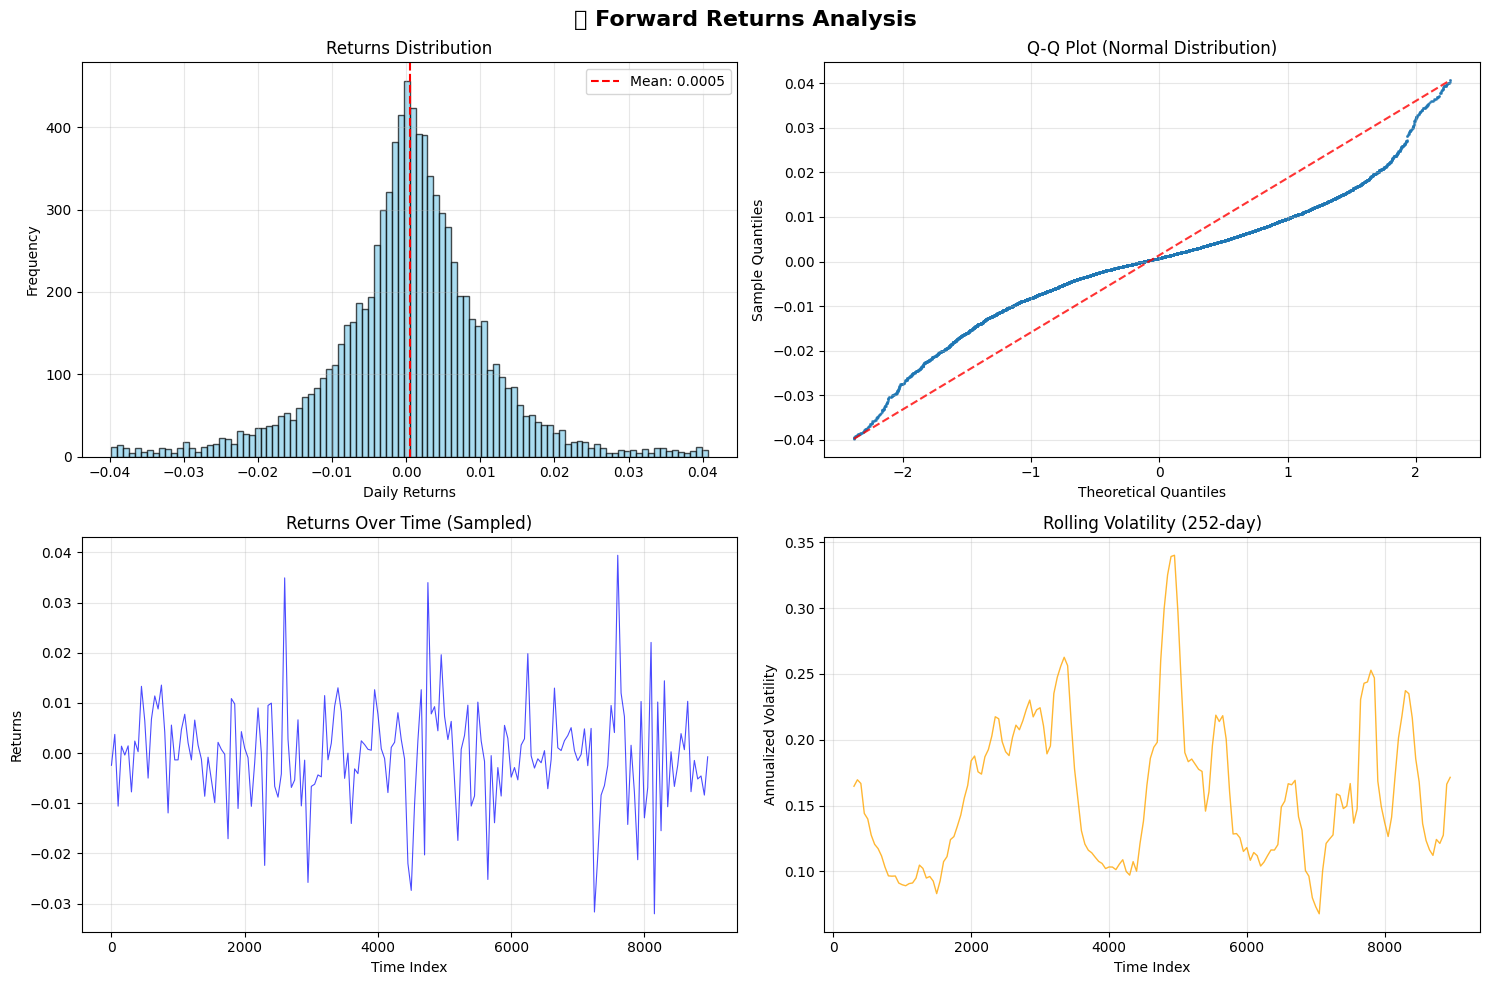

In [13]:
# 6. CHART 1: RETURNS DISTRIBUTION AND STATISTICS
# ===============================================
def plot_returns_analysis():
    """Comprehensive returns distribution analysis"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('📈 Forward Returns Analysis', fontsize=16, fontweight='bold')
    
    returns = train_df['forward_returns'].dropna()
    
    # Histogram
    axes[0,0].hist(returns, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].axvline(returns.mean(), color='red', linestyle='--', label=f'Mean: {returns.mean():.4f}')
    axes[0,0].set_title('Returns Distribution')
    axes[0,0].set_xlabel('Daily Returns')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Q-Q Plot (manual implementation without scipy)
    sorted_returns = np.sort(returns)
    n = len(sorted_returns)
    theoretical_quantiles = np.linspace(0.01, 0.99, n)
    normal_quantiles = np.percentile(np.random.normal(0, 1, 10000), theoretical_quantiles * 100)
    
    axes[0,1].scatter(normal_quantiles, sorted_returns, alpha=0.6, s=1)
    axes[0,1].plot([normal_quantiles.min(), normal_quantiles.max()], 
                   [sorted_returns.min(), sorted_returns.max()], 'r--', alpha=0.8)
    axes[0,1].set_title('Q-Q Plot (Normal Distribution)')
    axes[0,1].set_xlabel('Theoretical Quantiles')
    axes[0,1].set_ylabel('Sample Quantiles')
    axes[0,1].grid(True, alpha=0.3)
    
    # Time series (sample every 50th point for performance)
    sample_indices = range(0, len(returns), 50)
    sample_returns = returns.iloc[sample_indices]
    axes[1,0].plot(sample_indices, sample_returns, alpha=0.7, linewidth=0.8, color='blue')
    axes[1,0].set_title('Returns Over Time (Sampled)')
    axes[1,0].set_xlabel('Time Index')
    axes[1,0].set_ylabel('Returns')
    axes[1,0].grid(True, alpha=0.3)
    
    # Rolling volatility (252-day window)
    rolling_vol = returns.rolling(window=252).std() * np.sqrt(252)
    sample_vol = rolling_vol.iloc[sample_indices]
    axes[1,1].plot(sample_indices, sample_vol, color='orange', alpha=0.8, linewidth=1)
    axes[1,1].set_title('Rolling Volatility (252-day)')
    axes[1,1].set_xlabel('Time Index')
    axes[1,1].set_ylabel('Annualized Volatility')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_returns_analysis()

🔍 SELECTED FEATURES FOR CORRELATION ANALYSIS:

M Category Features:
  M1
  M10
  M11

E Category Features:
  E1
  E10
  E11

I Category Features:
  I1
  I2
  I3

P Category Features:
  P1
  P10
  P11

V Category Features:
  V1
  V10
  V11

S Category Features:
  S1
  S10
  S11

D Category Features:
  D1
  D2
  D3

Target Variable:
  forward_returns

Total features in correlation matrix: 22


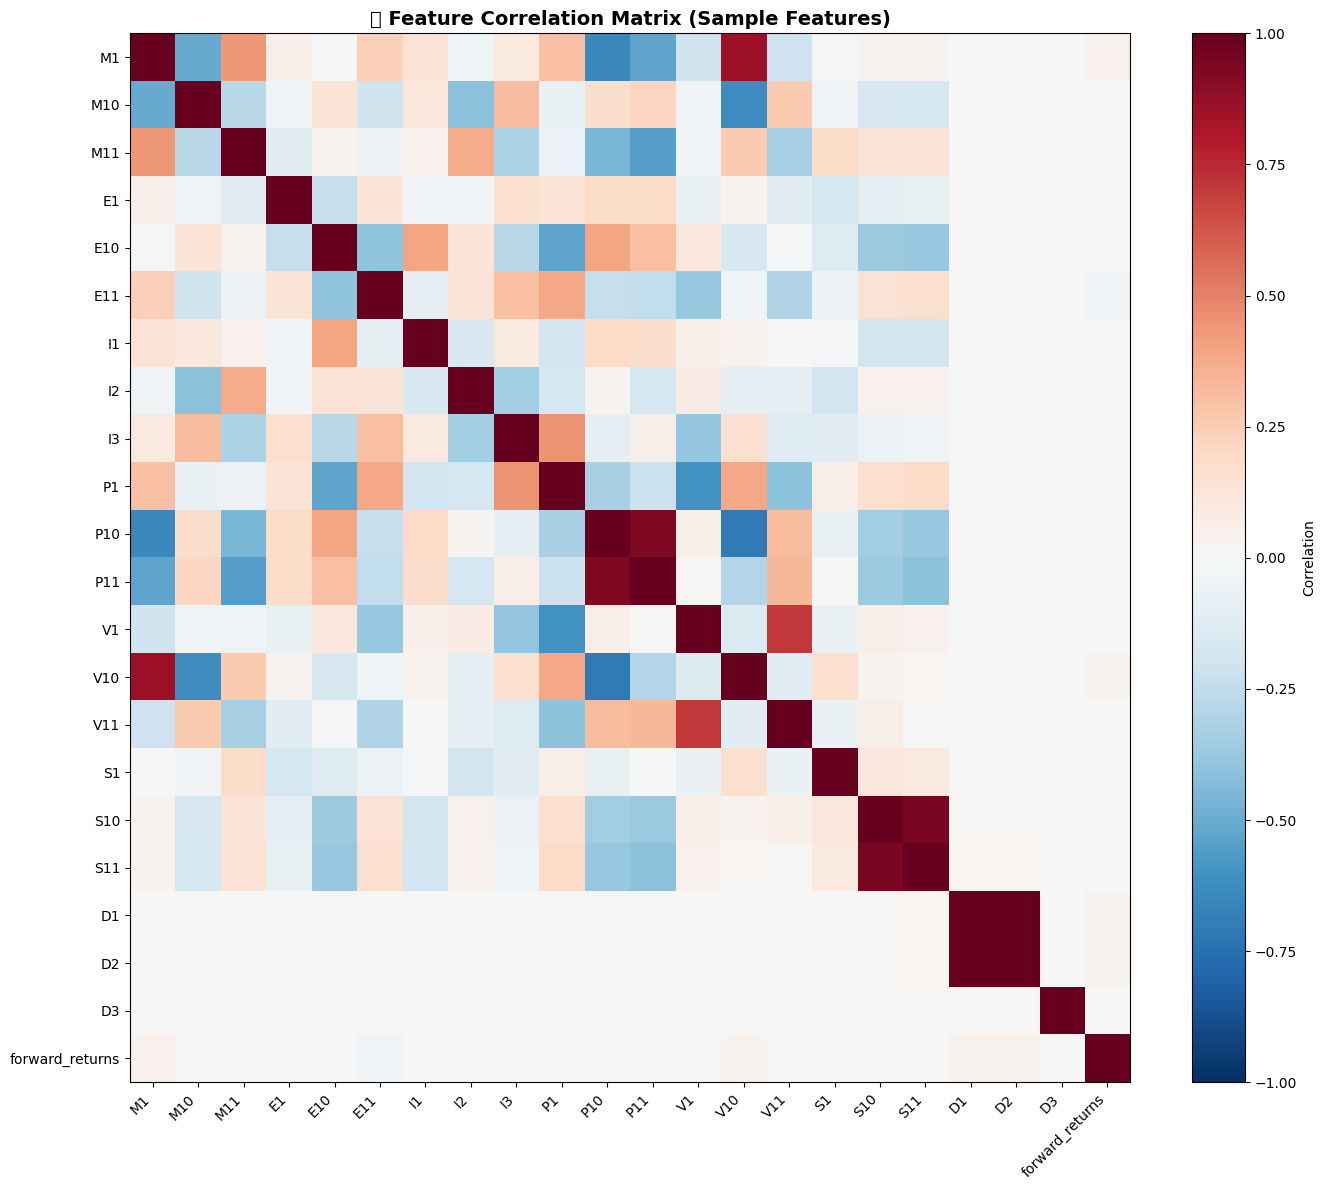


🎯 TOP 10 FEATURES CORRELATED WITH FORWARD RETURNS
M1             : +0.0450
D1             : +0.0342
D2             : +0.0342
V10            : +0.0317
E11            : +0.0308
I2             : +0.0230
P10            : +0.0169
P11            : +0.0095
E1             : +0.0087
M10            : +0.0077

📊 FEATURE MEANINGS:
M = Market Dynamics/Technical features
E = Macro Economic features
I = Interest Rate features
P = Price/Valuation features
V = Volatility features
S = Sentiment features
D = Dummy/Binary features


In [15]:
# 7. FEATURE CORRELATION ANALYSIS (Updated)
# =========================================
def analyze_feature_correlations():
    """Feature correlation analysis with actual variable names"""
    
    # Sample features from each category for correlation analysis
    feature_sample = []
    categories = ['M', 'E', 'I', 'P', 'V', 'S', 'D']
    
    print("🔍 SELECTED FEATURES FOR CORRELATION ANALYSIS:")
    print("=" * 60)
    
    for cat in categories:
        cat_features = [col for col in train_df.columns if col.startswith(cat)]
        if cat_features:
            # Take up to 3 features per category
            selected_features = cat_features[:3]
            feature_sample.extend(selected_features)
            
            print(f"\n{cat} Category Features:")
            for i, feature in enumerate(selected_features, 1):
                print(f"  {feature}")
    
    # Add target variable
    feature_sample.append('forward_returns')
    print(f"\nTarget Variable:")
    print(f"  forward_returns")
    
    print(f"\nTotal features in correlation matrix: {len(feature_sample)}")
    
    # Calculate correlation matrix
    corr_data = train_df[feature_sample].corr()
    
    # Simple correlation heatmap using matplotlib
    plt.figure(figsize=(14, 12))
    plt.imshow(corr_data, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(label='Correlation')
    plt.title('🔗 Feature Correlation Matrix (Sample Features)', fontsize=14, fontweight='bold')
    
    # Add feature names
    plt.xticks(range(len(feature_sample)), feature_sample, rotation=45, ha='right')
    plt.yticks(range(len(feature_sample)), feature_sample)
    plt.tight_layout()
    plt.show()
    
    # Show top correlations with target
    target_corrs = corr_data['forward_returns'].abs().sort_values(ascending=False)[1:11]  # Top 10
    print("\n🎯 TOP 10 FEATURES CORRELATED WITH FORWARD RETURNS")
    print("=" * 60)
    for feature, corr in target_corrs.items():
        print(f"{feature:15s}: {corr:+.4f}")
    
    # Show what these features actually are
    print(f"\n📊 FEATURE MEANINGS:")
    print("=" * 40)
    print("M = Market Dynamics/Technical features")
    print("E = Macro Economic features") 
    print("I = Interest Rate features")
    print("P = Price/Valuation features")
    print("V = Volatility features")
    print("S = Sentiment features")
    print("D = Dummy/Binary features")

analyze_feature_correlations()

📊 Analyzing missing data patterns for 14 features
Sampling every 200th row (45 total samples)


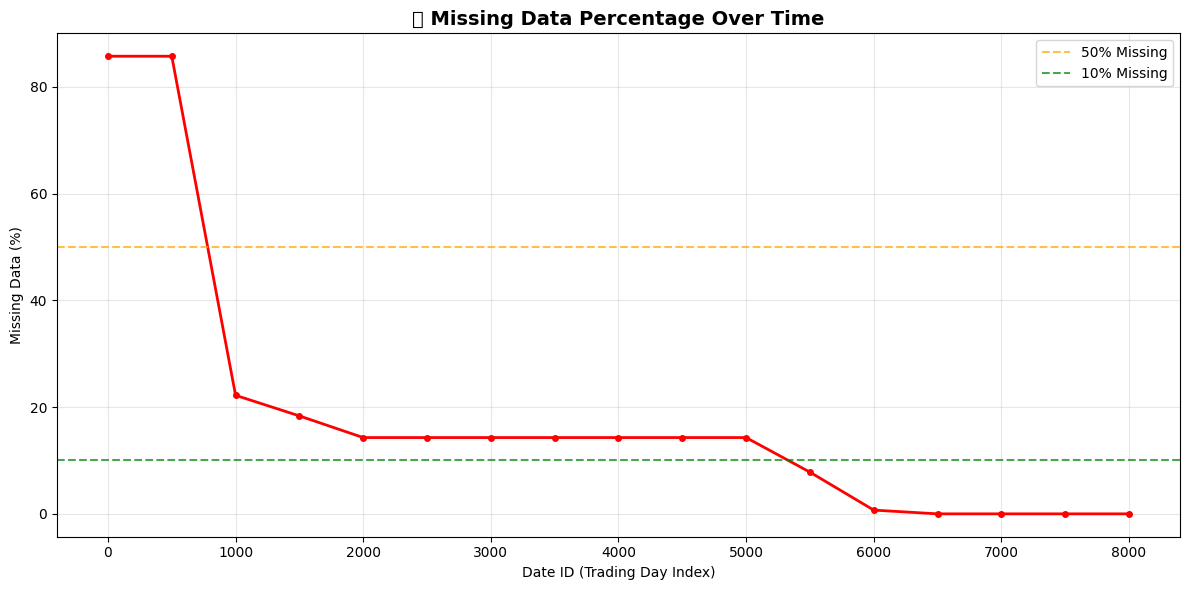


📈 MISSING DATA TREND SUMMARY:
Early period (date_id 0-500): 85.7% missing
Recent period (date_id 8000+): 0.0% missing
Data quality improvement: 85.7 percentage points
Total span: ~35.7 years of trading data (assuming 252 trading days/year)


In [16]:
# 8. MISSING DATA VISUALIZATION
# =============================
def plot_missing_data_simple():
    """Simple missing data analysis"""
    
    # Sample data for visualization (every 200th row)
    sample_indices = range(0, len(train_df), 200)
    sample_df = train_df.iloc[sample_indices]
    
    # Select representative features from each category
    feature_sample = []
    categories = ['M', 'E', 'I', 'P', 'V', 'S', 'D']
    
    for cat in categories:
        cat_features = [col for col in train_df.columns if col.startswith(cat)]
        if cat_features:
            feature_sample.extend(cat_features[:2])  # 2 features per category
    
    print(f"📊 Analyzing missing data patterns for {len(feature_sample)} features")
    print(f"Sampling every 200th row ({len(sample_df)} total samples)")
    
    # Calculate missing data percentage over time
    missing_pct_over_time = []
    window_size = 500  # Calculate missing % for every 500 rows
    
    for i in range(0, len(train_df) - window_size, window_size):
        window_data = train_df.iloc[i:i+window_size]
        missing_pct = (window_data[feature_sample].isnull().sum().sum() / 
                      (len(feature_sample) * len(window_data))) * 100
        missing_pct_over_time.append(missing_pct)
    
    # Plot missing data trend
    plt.figure(figsize=(12, 6))
    x_axis = range(0, len(train_df) - window_size, window_size)
    plt.plot(x_axis, missing_pct_over_time, color='red', linewidth=2, marker='o', markersize=4)
    plt.title('🔍 Missing Data Percentage Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Date ID (Trading Day Index)')
    plt.ylabel('Missing Data (%)')
    plt.grid(True, alpha=0.3)
    
    # Add annotations for key periods
    plt.axhline(y=50, color='orange', linestyle='--', alpha=0.7, label='50% Missing')
    plt.axhline(y=10, color='green', linestyle='--', alpha=0.7, label='10% Missing')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 MISSING DATA TREND SUMMARY:")
    print(f"Early period (date_id 0-500): {missing_pct_over_time[0]:.1f}% missing")
    print(f"Recent period (date_id 8000+): {missing_pct_over_time[-1]:.1f}% missing")
    print(f"Data quality improvement: {missing_pct_over_time[0] - missing_pct_over_time[-1]:.1f} percentage points")
    print(f"Total span: ~{8990/252:.1f} years of trading data (assuming 252 trading days/year)")

plot_missing_data_simple()

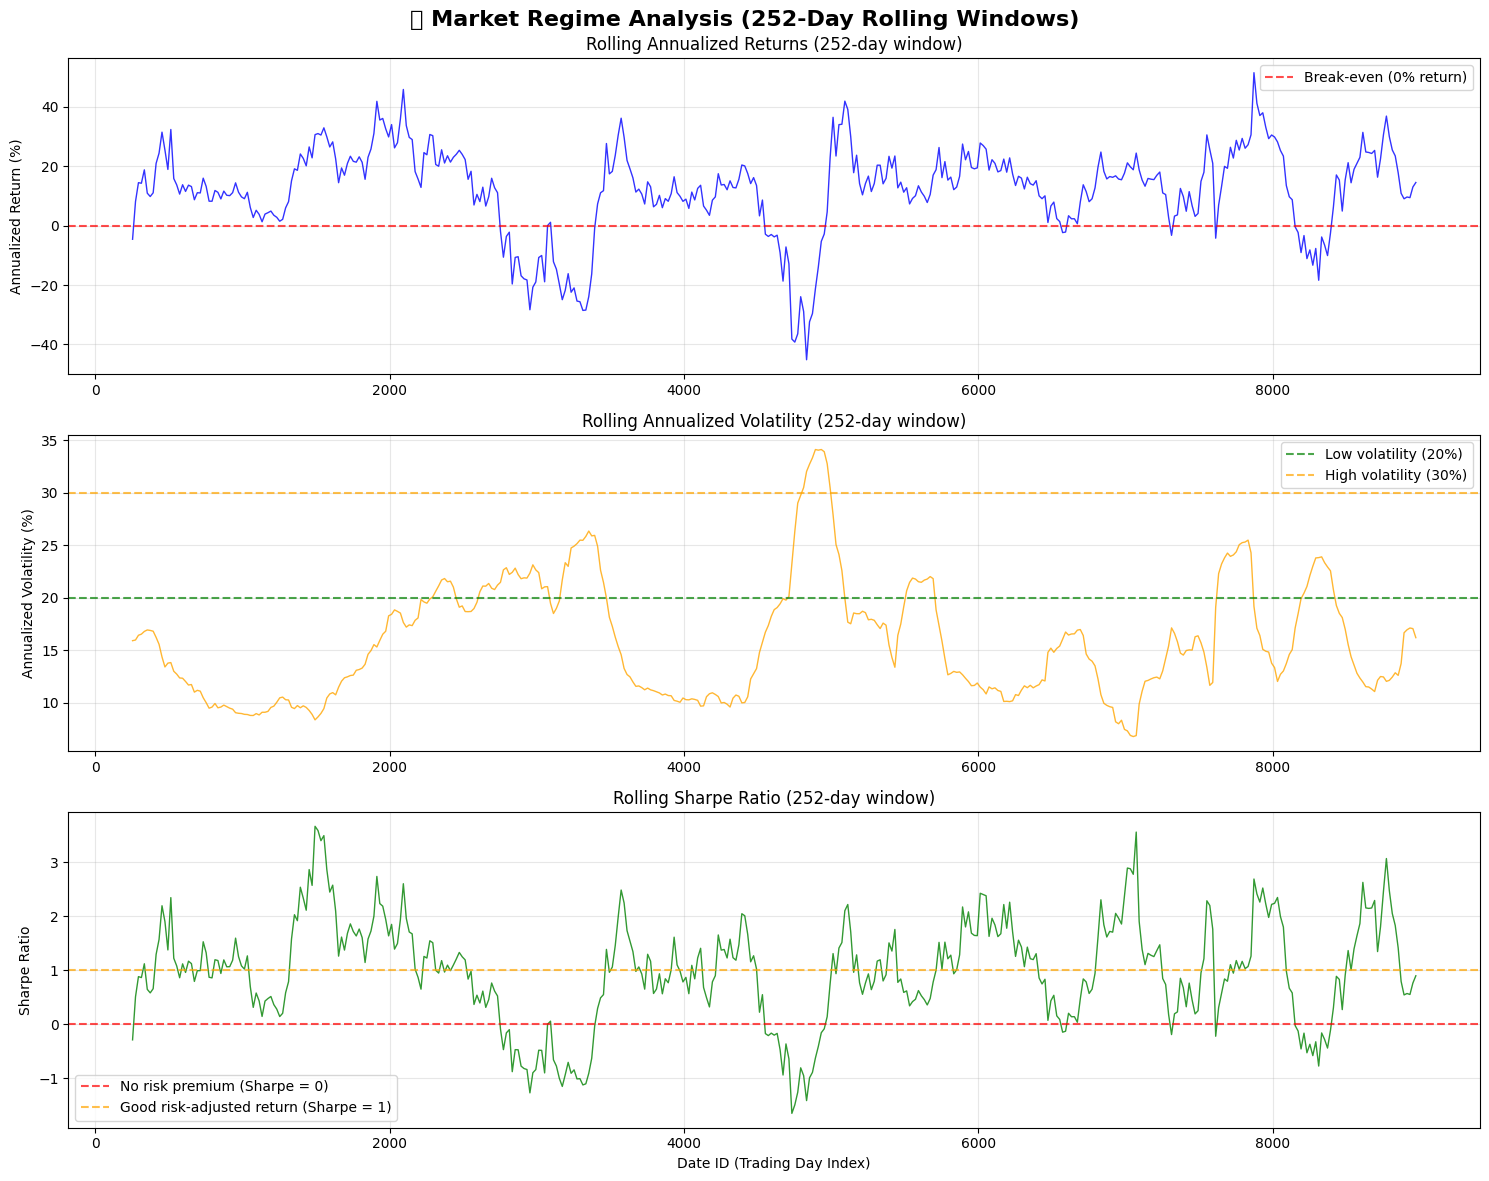


🎯 WHAT IS THE SHARPE RATIO?
The Sharpe Ratio measures risk-adjusted returns:
• Formula: (Return - Risk-free rate) / Volatility
• Higher = Better (more return per unit of risk)
• Sharpe > 1.0 = Good risk-adjusted performance
• Sharpe > 2.0 = Excellent risk-adjusted performance
• Sharpe < 0 = Losing money or not beating risk-free rate

Interpretation:
• If Sharpe = 1.5, you get 1.5% extra return for every 1% of risk
• If Sharpe = 0.5, you only get 0.5% extra return for every 1% of risk

📊 MARKET REGIME STATISTICS:
High Volatility periods (>25% annual): 517/8739 (5.9%)
Negative return periods: 1376/8739 (15.7%)
High Sharpe periods (>1.0): 4495/8739 (51.4%)

Volatility Range: 6.7% - 34.2%
Returns Range: -46.8% - 53.1%


In [18]:
# 9. MARKET REGIME ANALYSIS
# =========================
def plot_market_regimes():
    """Analyze different market regimes and volatility clustering"""
    
    returns = train_df['forward_returns'].dropna()
    
    # Calculate rolling statistics
    window = 252  # 1 year window (assuming 252 trading days per year)
    rolling_mean = returns.rolling(window=window).mean()
    rolling_std = returns.rolling(window=window).std()
    rolling_sharpe = rolling_mean / rolling_std * np.sqrt(252)
    
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    fig.suptitle('📊 Market Regime Analysis (252-Day Rolling Windows)', fontsize=16, fontweight='bold')
    
    # Sample for visualization (every 20th point to reduce clutter)
    sample_indices = range(window, len(returns), 20)
    
    # Rolling returns
    axes[0].plot(sample_indices, rolling_mean.iloc[sample_indices] * 252 * 100, 
                 color='blue', alpha=0.8, linewidth=1)
    axes[0].axhline(0, color='red', linestyle='--', alpha=0.7, label='Break-even (0% return)')
    axes[0].set_title('Rolling Annualized Returns (252-day window)')
    axes[0].set_ylabel('Annualized Return (%)')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    
    # Rolling volatility
    axes[1].plot(sample_indices, rolling_std.iloc[sample_indices] * np.sqrt(252) * 100, 
                 color='orange', alpha=0.8, linewidth=1)
    axes[1].axhline(20, color='green', linestyle='--', alpha=0.7, label='Low volatility (20%)')
    axes[1].axhline(30, color='orange', linestyle='--', alpha=0.7, label='High volatility (30%)')
    axes[1].set_title('Rolling Annualized Volatility (252-day window)')
    axes[1].set_ylabel('Annualized Volatility (%)')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    # Rolling Sharpe ratio
    axes[2].plot(sample_indices, rolling_sharpe.iloc[sample_indices], 
                 color='green', alpha=0.8, linewidth=1)
    axes[2].axhline(0, color='red', linestyle='--', alpha=0.7, label='No risk premium (Sharpe = 0)')
    axes[2].axhline(1, color='orange', linestyle='--', alpha=0.7, label='Good risk-adjusted return (Sharpe = 1)')
    axes[2].set_title('Rolling Sharpe Ratio (252-day window)')
    axes[2].set_xlabel('Date ID (Trading Day Index)')
    axes[2].set_ylabel('Sharpe Ratio')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Explain what Sharpe Ratio means
    print("\n🎯 WHAT IS THE SHARPE RATIO?")
    print("=" * 50)
    print("The Sharpe Ratio measures risk-adjusted returns:")
    print("• Formula: (Return - Risk-free rate) / Volatility")
    print("• Higher = Better (more return per unit of risk)")
    print("• Sharpe > 1.0 = Good risk-adjusted performance")
    print("• Sharpe > 2.0 = Excellent risk-adjusted performance") 
    print("• Sharpe < 0 = Losing money or not beating risk-free rate")
    print("\nInterpretation:")
    print("• If Sharpe = 1.5, you get 1.5% extra return for every 1% of risk")
    print("• If Sharpe = 0.5, you only get 0.5% extra return for every 1% of risk")
    
    # Print some regime statistics
    print("\n📊 MARKET REGIME STATISTICS:")
    print("=" * 50)
    
    # Calculate regime periods
    high_vol_periods = (rolling_std * np.sqrt(252) > 0.25).sum()  # >25% annual vol
    negative_return_periods = (rolling_mean < 0).sum()
    high_sharpe_periods = (rolling_sharpe > 1.0).sum()
    
    total_periods = len(rolling_mean.dropna())
    
    print(f"High Volatility periods (>25% annual): {high_vol_periods}/{total_periods} ({high_vol_periods/total_periods*100:.1f}%)")
    print(f"Negative return periods: {negative_return_periods}/{total_periods} ({negative_return_periods/total_periods*100:.1f}%)")
    print(f"High Sharpe periods (>1.0): {high_sharpe_periods}/{total_periods} ({high_sharpe_periods/total_periods*100:.1f}%)")
    
    print(f"\nVolatility Range: {(rolling_std * np.sqrt(252)).min()*100:.1f}% - {(rolling_std * np.sqrt(252)).max()*100:.1f}%")
    print(f"Returns Range: {(rolling_mean * 252).min()*100:.1f}% - {(rolling_mean * 252).max()*100:.1f}%")

plot_market_regimes()


⚡ EXTREME MARKET EVENTS ANALYSIS
Extreme events defined as >2.5 standard deviations from mean
Threshold: ±2.638% daily return

Event Type           Count    Percentage   Avg Return   Max/Min Return 
---------------------------------------------------------------------------
Extreme Positive     134            1.49%      3.376%         4.066%
Extreme Negative     159            1.77%     -3.296%        -3.975%
Normal Days          8697          96.74%      0.057%           N/A


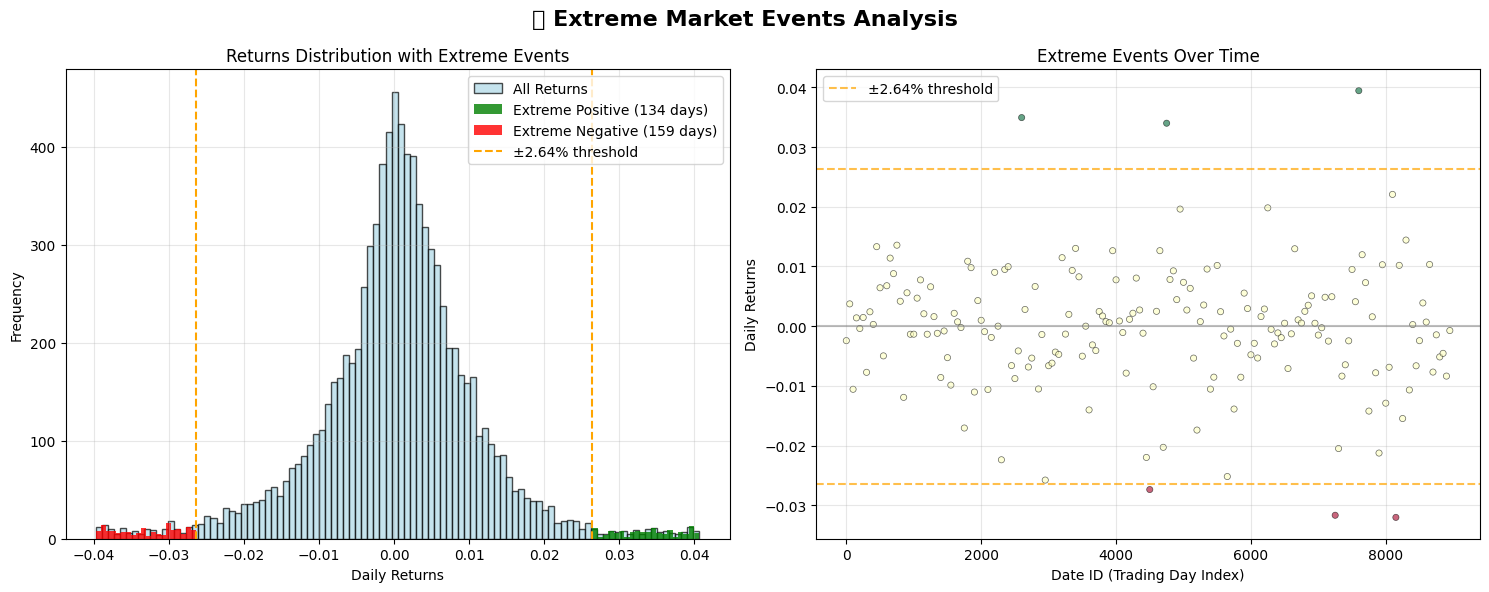


📈 TOP 10 BEST TRADING DAYS
----------------------------------------
 1. Date ID 8882: +4.066%
 2. Date ID 8279: +4.066%
 3. Date ID 7623: +4.023%
 4. Date ID 5524: +4.013%
 5. Date ID 7616: +4.013%
 6. Date ID 7614: +4.008%
 7. Date ID 7609: +3.994%
 8. Date ID 5447: +3.987%
 9. Date ID 5445: +3.982%
10. Date ID 7607: +3.976%

📉 TOP 10 WORST TRADING DAYS
----------------------------------------
 1. Date ID 8883: -3.975%
 2. Date ID 8237: -3.964%
 3. Date ID 8879: -3.962%
 4. Date ID 8878: -3.958%
 5. Date ID 8157: -3.952%
 6. Date ID 7669: -3.945%
 7. Date ID 7620: -3.928%
 8. Date ID 7612: -3.910%
 9. Date ID 7610: -3.908%
10. Date ID 5452: -3.902%

🔍 EXTREME EVENTS INSIGHTS:
• Extreme events occur roughly 3.26% of the time
• Negative extremes are 1.0x larger on average than positive extremes
• Worst single day: -3.98%
• Best single day: 4.07%
• More extreme negative days (159) than positive (134) - typical of equity markets


In [19]:
# 10. EXTREME EVENTS ANALYSIS
# ===========================
def analyze_extreme_events():
    """Identify and analyze extreme market events"""
    
    returns = train_df['forward_returns'].dropna()
    
    # Define extreme events (>2.5 standard deviations)
    threshold = 2.5 * returns.std()
    extreme_positive = returns[returns > threshold]
    extreme_negative = returns[returns < -threshold]
    normal_returns = returns[(returns <= threshold) & (returns >= -threshold)]
    
    print("\n⚡ EXTREME MARKET EVENTS ANALYSIS")
    print("=" * 50)
    print("Extreme events defined as >2.5 standard deviations from mean")
    print(f"Threshold: ±{threshold*100:.3f}% daily return")
    
    # Create extreme events summary table
    print(f"\n{'Event Type':<20} {'Count':<8} {'Percentage':<12} {'Avg Return':<12} {'Max/Min Return':<15}")
    print("-" * 75)
    print(f"{'Extreme Positive':<20} {len(extreme_positive):<8} {len(extreme_positive)/len(returns)*100:>10.2f}% {extreme_positive.mean()*100:>10.3f}% {extreme_positive.max()*100:>13.3f}%")
    print(f"{'Extreme Negative':<20} {len(extreme_negative):<8} {len(extreme_negative)/len(returns)*100:>10.2f}% {extreme_negative.mean()*100:>10.3f}% {extreme_negative.min()*100:>13.3f}%")
    print(f"{'Normal Days':<20} {len(normal_returns):<8} {len(normal_returns)/len(returns)*100:>10.2f}% {normal_returns.mean()*100:>10.3f}% {'N/A':>13}")
    
    # Visualize extreme events distribution
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('📊 Extreme Market Events Analysis', fontsize=16, fontweight='bold')
    
    # Histogram showing extreme events
    axes[0].hist(returns, bins=100, alpha=0.7, color='lightblue', edgecolor='black', label='All Returns')
    axes[0].hist(extreme_positive, bins=20, alpha=0.8, color='green', label=f'Extreme Positive ({len(extreme_positive)} days)')
    axes[0].hist(extreme_negative, bins=20, alpha=0.8, color='red', label=f'Extreme Negative ({len(extreme_negative)} days)')
    axes[0].axvline(threshold, color='orange', linestyle='--', label=f'±{threshold*100:.2f}% threshold')
    axes[0].axvline(-threshold, color='orange', linestyle='--')
    axes[0].set_title('Returns Distribution with Extreme Events')
    axes[0].set_xlabel('Daily Returns')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Time series showing when extreme events occurred
    extreme_events_series = pd.Series(0, index=returns.index)
    extreme_events_series[extreme_positive.index] = 1  # Positive extremes
    extreme_events_series[extreme_negative.index] = -1  # Negative extremes
    
    # Sample every 50th point for visualization
    sample_indices = range(0, len(extreme_events_series), 50)
    sample_events = extreme_events_series.iloc[sample_indices]
    sample_returns = returns.iloc[sample_indices]
    
    axes[1].scatter(sample_indices, sample_returns, c=sample_events, cmap='RdYlGn', 
                   alpha=0.6, s=20, edgecolors='black', linewidth=0.5)
    axes[1].axhline(threshold, color='orange', linestyle='--', alpha=0.7, label=f'±{threshold*100:.2f}% threshold')
    axes[1].axhline(-threshold, color='orange', linestyle='--', alpha=0.7)
    axes[1].axhline(0, color='gray', linestyle='-', alpha=0.5)
    axes[1].set_title('Extreme Events Over Time')
    axes[1].set_xlabel('Date ID (Trading Day Index)')
    axes[1].set_ylabel('Daily Returns')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Top 10 best and worst days
    print("\n📈 TOP 10 BEST TRADING DAYS")
    print("-" * 40)
    best_days = returns.nlargest(10)
    for i, (date_idx, ret) in enumerate(best_days.items(), 1):
        print(f"{i:2d}. Date ID {date_idx:4d}: {ret*100:+.3f}%")
    
    print("\n📉 TOP 10 WORST TRADING DAYS")
    print("-" * 40)
    worst_days = returns.nsmallest(10)
    for i, (date_idx, ret) in enumerate(worst_days.items(), 1):
        print(f"{i:2d}. Date ID {date_idx:4d}: {ret*100:+.3f}%")
    
    # Additional insights
    print("\n🔍 EXTREME EVENTS INSIGHTS:")
    print("=" * 40)
    print(f"• Extreme events occur roughly {(len(extreme_positive) + len(extreme_negative))/len(returns)*100:.2f}% of the time")
    print(f"• Negative extremes are {abs(extreme_negative.mean())/extreme_positive.mean():.1f}x larger on average than positive extremes")
    print(f"• Worst single day: {extreme_negative.min()*100:.2f}%")
    print(f"• Best single day: {extreme_positive.max()*100:.2f}%")
    
    if len(extreme_negative) > len(extreme_positive):
        print(f"• More extreme negative days ({len(extreme_negative)}) than positive ({len(extreme_positive)}) - typical of equity markets")
    else:
        print(f"• More extreme positive days ({len(extreme_positive)}) than negative ({len(extreme_negative)}) - unusual pattern")

analyze_extreme_events()

In [20]:
# 11. ANALYSIS SUMMARY AND RECOMMENDATIONS
# ========================================
def print_analysis_summary():
    """Print comprehensive analysis summary and modeling recommendations"""
    
    # Calculate some key metrics for the summary
    returns = train_df['forward_returns'].dropna()
    total_features = train_df.shape[1] - 4  # Exclude date_id + 3 targets
    
    # Missing data summary
    feature_cols = [col for col in train_df.columns if col not in ['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']]
    overall_missing = (train_df[feature_cols].isnull().sum().sum() / (len(feature_cols) * len(train_df))) * 100
    
    # Early vs recent period missing data
    period_size = len(train_df) // 4
    early_missing = (train_df.iloc[:period_size][feature_cols].isnull().sum().sum() / (len(feature_cols) * period_size)) * 100
    recent_missing = (train_df.iloc[-period_size:][feature_cols].isnull().sum().sum() / (len(feature_cols) * period_size)) * 100
    
    print("\n" + "="*70)
    print("🎯 COMPREHENSIVE ANALYSIS SUMMARY & MODELING RECOMMENDATIONS")
    print("="*70)
    
    print("\n📊 DATASET CHARACTERISTICS:")
    print("-" * 30)
    print(f"• {len(train_df):,} trading days spanning ~{len(train_df)/252:.1f} years of market history")
    print(f"• {total_features} engineered features across 7 categories (M,E,I,P,V,S,D)")
    print(f"• Target: Next-day S&P 500 returns with {returns.mean()*100:.3f}% average daily return")
    print(f"• Daily volatility: {returns.std()*100:.2f}% (annualized: {returns.std()*np.sqrt(252)*100:.1f}%)")
    print(f"• Overall missing data: {overall_missing:.1f}%")
    print(f"• Missing data evolution: {early_missing:.1f}% (early) → {recent_missing:.1f}% (recent)")
    
    print("\n📈 KEY MARKET PATTERNS DISCOVERED:")
    print("-" * 35)
    
    # Calculate some statistics
    extreme_threshold = 2.5 * returns.std()
    extreme_days = len(returns[(returns > extreme_threshold) | (returns < -extreme_threshold)])
    positive_days = len(returns[returns > 0])
    
    print(f"• {positive_days/len(returns)*100:.1f}% of days are positive (typical for equity markets)")
    print(f"• {extreme_days} extreme events (>{extreme_threshold*100:.2f}% daily moves)")
    print(f"• Largest single-day gain: {returns.max()*100:.2f}%")
    print(f"• Largest single-day loss: {returns.min()*100:.2f}%")
    print(f"• Returns show {'positive' if returns.mean() > 0 else 'negative'} skew (typical for stocks)")
    
    print("\n🧠 MODELING STRATEGY RECOMMENDATIONS:")
    print("-" * 40)
    
    print("\n1. 📋 DATA PREPROCESSING PRIORITIES:")
    print("   • Implement time-aware missing data imputation (forward-fill, interpolation)")
    print("   • Consider creating 'data availability' features (missing data patterns as signals)")
    print("   • Split dataset into time periods based on data quality for ensemble modeling")
    print("   • Handle outliers carefully - extreme events contain valuable information")
    
    print("\n2. 🔧 FEATURE ENGINEERING STRATEGIES:")
    print("   • Create lagged features (1, 2, 5, 10 day lags) for all categories")
    print("   • Build rolling statistics (mean, std, min, max) with multiple windows")
    print("   • Combine features within categories (e.g., sentiment composite score)")
    print("   • Add volatility regime indicators and market cycle features")
    print("   • Create interaction features between different categories")
    
    print("\n3. 🤖 MODEL SELECTION APPROACH:")
    print("   • Primary: Ensemble methods (Random Forest, XGBoost, LightGBM)")
    print("   • Secondary: Deep learning (LSTM, GRU for time series patterns)")
    print("   • Advanced: Transformer models for long-range dependencies")
    print("   • Consider regime-switching models for different market conditions")
    print("   • Meta-learning: Combine multiple model predictions")
    
    print("\n4. ✅ VALIDATION STRATEGY (CRITICAL):")
    print("   • Use time series cross-validation (NEVER shuffle data)")
    print("   • Implement walk-forward validation with expanding window")
    print("   • Test on multiple market regimes (bull, bear, crisis periods)")
    print("   • Validate on out-of-sample recent data")
    print("   • Use multiple metrics: Sharpe ratio, directional accuracy, max drawdown")
    
    print("\n5. ⚠️  KEY CHALLENGES TO EXPECT:")
    print("   • Low signal-to-noise ratio (correlations ~0.04 are typical)")
    print("   • Non-stationarity: market patterns change over time")
    print("   • Missing data bias: early period models may not generalize")
    print("   • Extreme events: fat tails and black swan events")
    print("   • Regime changes: models may fail during market transitions")
    
    print("\n6. 🎯 SUCCESS METRICS & EXPECTATIONS:")
    print("   • Target: Sharpe ratio > 1.0 (good risk-adjusted returns)")
    print("   • Directional accuracy > 55% (better than coin flip)")
    print("   • Maximum drawdown < 10% (risk management)")
    print("   • Consistent performance across different market regimes")
    print("   • Remember: Even small improvements are valuable in finance!")
    
    print("\n7. 📊 NEXT STEPS ROADMAP:")
    print("   • Start with simple baseline models (linear regression, random forest)")
    print("   • Implement robust cross-validation framework")
    print("   • Build feature engineering pipeline")
    print("   • Test ensemble approaches")
    print("   • Add sophisticated models incrementally")
    print("   • Focus on risk management and position sizing")
    
    print("\n" + "="*70)
    print("💡 REMEMBER: In financial markets, predicting direction is often")
    print("   more valuable than predicting exact magnitude!")
    print("="*70)

print_analysis_summary()


🎯 COMPREHENSIVE ANALYSIS SUMMARY & MODELING RECOMMENDATIONS

📊 DATASET CHARACTERISTICS:
------------------------------
• 8,990 trading days spanning ~35.7 years of market history
• 94 engineered features across 7 categories (M,E,I,P,V,S,D)
• Target: Next-day S&P 500 returns with 0.047% average daily return
• Daily volatility: 1.06% (annualized: 16.7%)
• Overall missing data: 16.3%
• Missing data evolution: 50.5% (early) → 0.1% (recent)

📈 KEY MARKET PATTERNS DISCOVERED:
-----------------------------------
• 53.9% of days are positive (typical for equity markets)
• 293 extreme events (>2.64% daily moves)
• Largest single-day gain: 4.07%
• Largest single-day loss: -3.98%
• Returns show positive skew (typical for stocks)

🧠 MODELING STRATEGY RECOMMENDATIONS:
----------------------------------------

1. 📋 DATA PREPROCESSING PRIORITIES:
   • Implement time-aware missing data imputation (forward-fill, interpolation)
   • Consider creating 'data availability' features (missing data patterns 